In [1]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
from math import ceil

In [2]:
mnist = load_digits()

mnist['images'].shape

(1797, 8, 8)

In [3]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

(array([6903., 7877., 6990., 7141., 6824., 6313., 6876., 7293., 6825.,
        6958.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

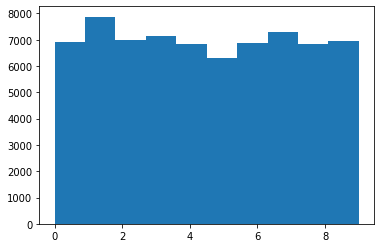

In [12]:
y = np.array([int(i) for i in y])
np.histogram(y)
plt.hist(y)

In [15]:
X.shape

(70000, 784)

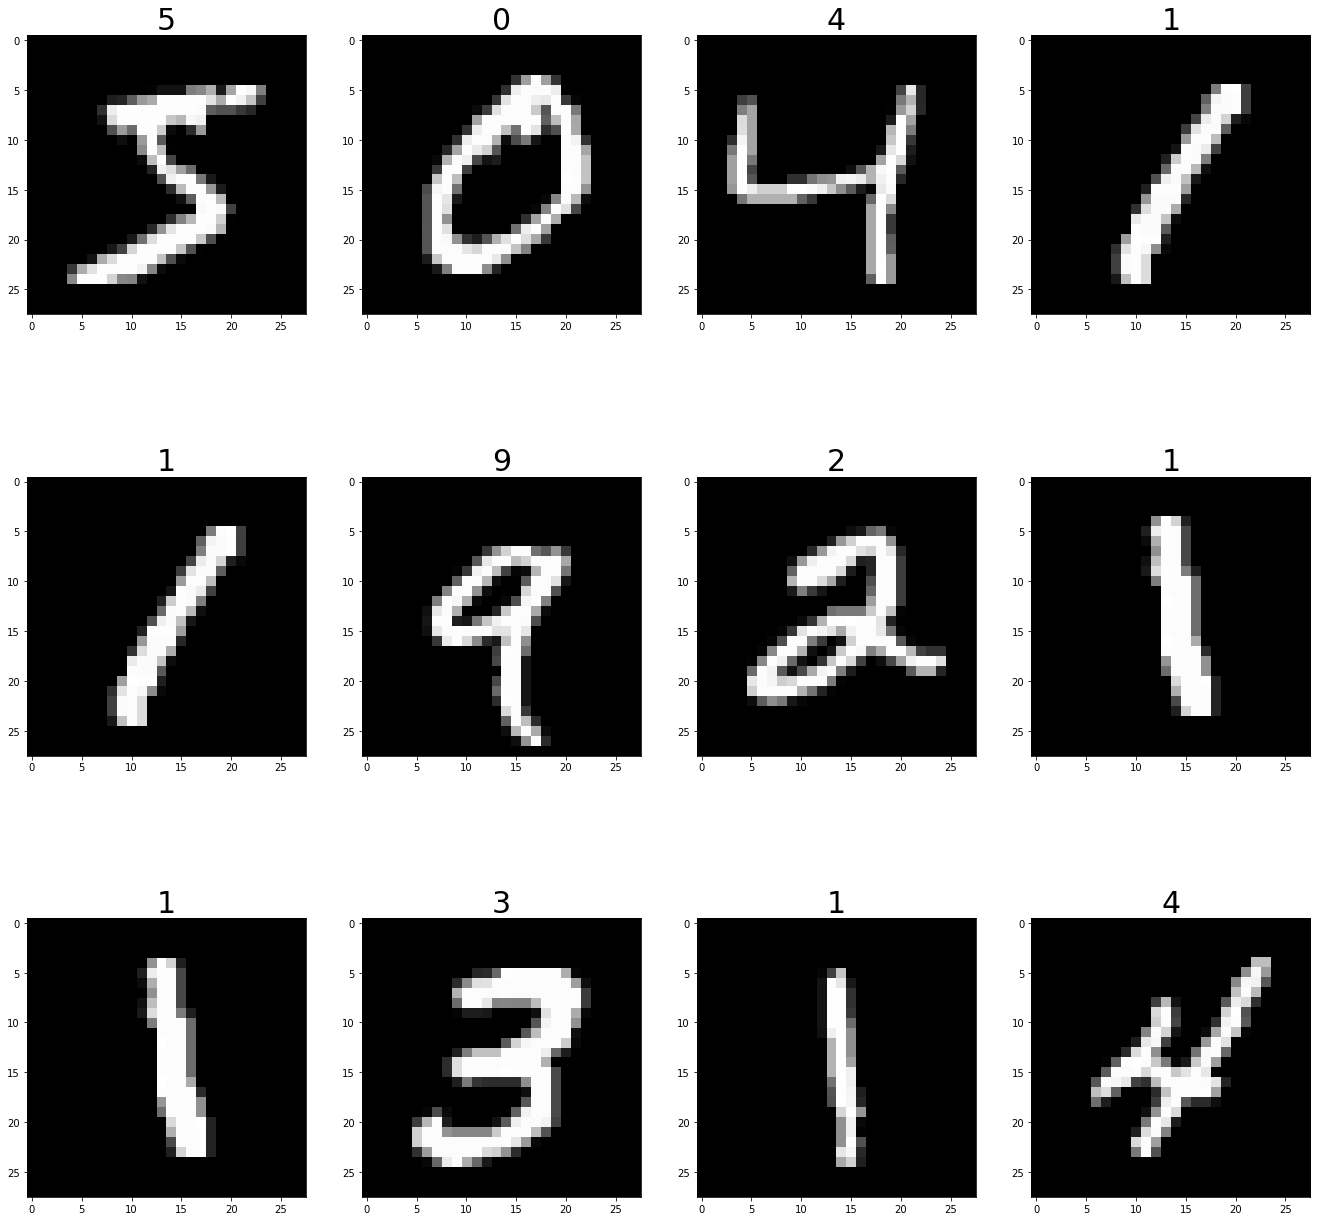

In [6]:
no_examples = 10
columns = 4
rows = ceil(no_examples/columns)

fig, axs = plt.subplots(rows, columns, figsize=((23,23)))

for i in range(rows):
    for j in range(columns):
        example = (np.array(X[i*rows+j], dtype='uint8').reshape((28,28)), y[i*rows+j])
        axs[i][j].imshow(example[0], cmap='gray')
        axs[i][j].set_title(example[1], fontsize=30)


In [17]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [19]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## Binary Classifier

In [20]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [23]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [25]:
sgd_clf.predict([X_test[0]])

array([False])

In [26]:
print(y_test[0])

7


In [27]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.9342 , 0.96095, 0.96505])

In [28]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [29]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[52959,  1620],
       [ 1176,  4245]])

In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))
print(f1_score(y_train_5, y_train_pred))

0.7237851662404092
0.7830658550083011
0.7522594364699627


In [40]:
y_score = sgd_clf.decision_function([X_test[0]])
threshold = 0

print((y_score > threshold))

[False]


In [41]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [42]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

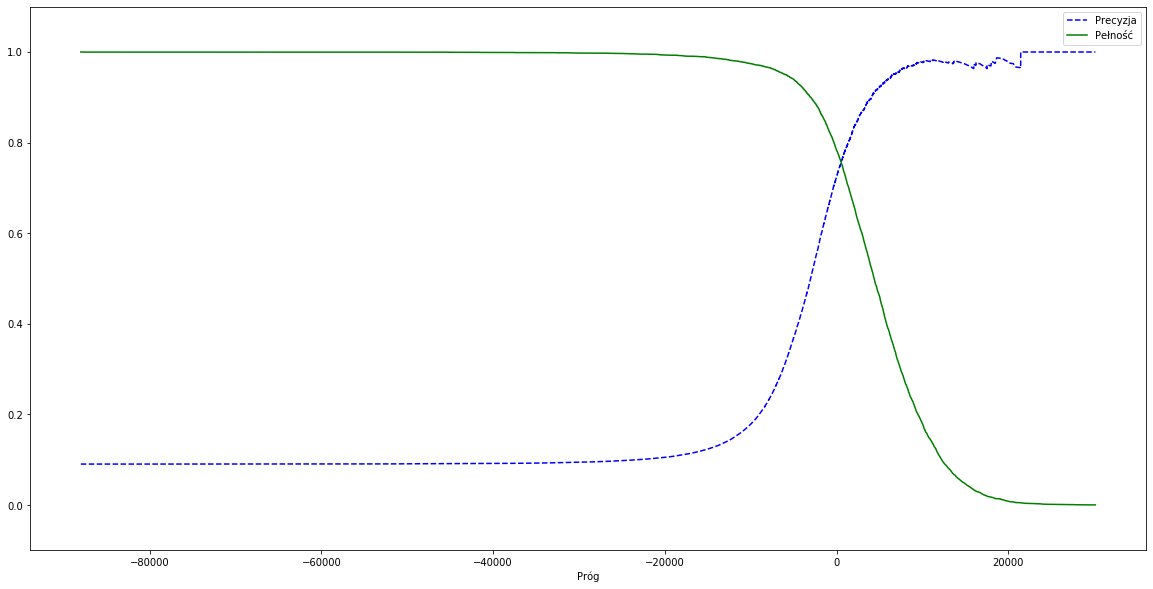

In [51]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(20,10))
    plt.plot(thresholds, precisions[:-1], "b--", label="Precyzja")
    plt.plot(thresholds, recalls[:-1], "g-", label="Pełność")
    plt.xlabel("Próg")
    plt.legend(loc="best")
    plt.ylim([-0.1,1.1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()
    

Text(0, 0.5, 'Precyzja')

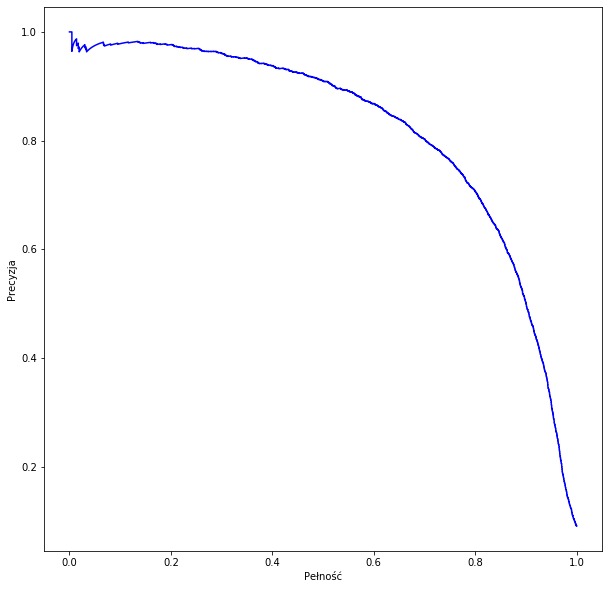

In [54]:
plt.figure(figsize=(10,10))
plt.plot(recalls[:-1], precisions[:-1], "b")
plt.xlabel("Pełność")
plt.ylabel("Precyzja")

In [96]:
y_train_pred_90 = (y_scores > 2200)
y_train_pred_90

array([False,  True, False, ..., False,  True, False])

In [97]:
precision_score(y_train_5, y_train_pred_90)

0.839789574366332

In [98]:
recall_score(y_train_5, y_train_pred_90)

0.6478509500092234